In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from matplotlib import colors
import numpy as np
import os,re
import math

# import plotting packages
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
from matplotlib import colors

from mpl_toolkits.mplot3d import Axes3D # 3d plot
from matplotlib import cm #color map
from matplotlib.ticker import FormatStrFormatter # set decimals in ticks
from matplotlib import rc,re
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator

font=12
fontfml='Times New Roman'
plt.rcParams['font.size'] = font
plt.rcParams['font.family'] = fontfml
plt.rcParams['mathtext.fontset']='custom'
plt.rcParams['mathtext.rm'] =fontfml
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
#plt.legend(loc="best",ncol=1,columnspacing=0.5,handlelength=1,handletextpad=0.3)

from LBL_funcs_fullSpectrum import *
from LBL_funcs_plotting import *
from LBL_funcs_inclined import *

from scipy.stats import gaussian_kde

In [2]:
dnu = 3# speactral resolution 0.1 is enough, 0.01 is too fine, especially for cloudy periods
nu=np.arange(2500,35000,dnu)
data = np.genfromtxt('./data/profiles/ASTMG173.csv', delimiter=',', skip_header=2,  # in wavenumber basis
                     names=['wavelength', 'extraterrestrial', '37tilt', 'direct_circum'])
ref_lam = data['wavelength']  # nm avoid hearder 1
ref_E = data['extraterrestrial']
ref_E_nu = -ref_E * ref_lam ** 2 / 1e7  # W/[m2*nm-1] tp W/[m2*cm-1]
F_dw_os = -np.interp(-nu, -1e7 / ref_lam, ref_E_nu)

In [3]:
file_dir = "./results_shortwave/SWSCOPE"
Fls = os.listdir(file_dir)
Fls = [f for f in Fls if f.startswith('Results_case2_RH=0.0_Tsurf=290_AOD=0.0_COD=0')]
Fls = np.sort(Fls)
#Fls
# print(Fls[0])
Fls_csky='Results_case2_RH=0.0_Tsurf=290_AOD=0.0_COD=0.0_kap=[8, 9, 10]_th0=0.npy'
results = np.load(file_dir +'/'+Fls_csky,  allow_pickle=True).item()
dnu = 3# speactral resolution 0.1 is enough, 0.01 is too fine, especially for cloudy periods
nu=np.arange(2500,35000,dnu) 
F_csk=np.trapz(results.get('F_uw')[-1,:],nu)
print('clearsky=',F_csk)

clearsky= 287.7833956641633


## Radius test agianst cleaksky (archieve)

### 1. clear sky 2D

In [5]:
file_dir = "./results_shortwave/SWSCOPE"
Fls2 = os.listdir(file_dir)
#targetregex = re.compile(r"Results_case2_COD=(\d+\.?\d*)_Tsurf=300_AOD=0\.0_COD=0\.0_th0=")
Fls2 = [f for f in Fls2 if f.startswith('UWxyzr_COD=0.0')]
Fls2 = np.sort(Fls2)
Fls2

array(['UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=0.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=15.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=30.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=45.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=75.npy'], dtype='<U40')

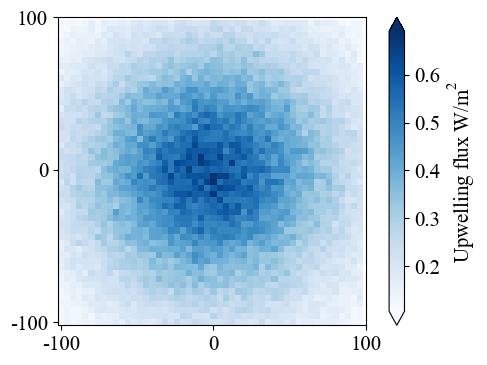

In [294]:
Fls_csky = 'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=0.npy'
for i in range(1): #len(Fls)):
    results = np.load(file_dir +'/'+Fls_csky,  allow_pickle=True).item()
    results.keys()
    uw_rxyz_M=results.get('uw_rxyz_M')
    uw_xyz_M=results.get('uw_xyz_M')

    F_uw_2d_clsky = uw_2D_pic(uw_xyz_M, uw_rxyz_M,0,F_dw_os,len(nu),1000)
    fig, (ax1) = plt.subplots(figsize=(6, 4), ncols=1) #,  ax3
    pos=ax1.imshow(F_uw_2D*3, cmap='Blues', origin="lower")#norm=colors.LogNorm())
    cbar = fig.colorbar(pos, ax=ax1, extend='both') #shrink=0.7)
    cbar.set_label('Upwelling flux W/m$^2$')
    ax1.set_xticks([0,25,50])
    ax1.set_xticklabels(['-100','0','100'])
    ax1.set_yticks([0,25,50])
    ax1.set_yticklabels(['-100','0','100'])
    
    # Theta = angularDstb(uw_rxyz_new,theta[0])
    # # Compute KDE
    # y = np.array(Theta).reshape(-1)
    # print(np.min(y),np.max(y))
    # kde = gaussian_kde(y)
    # x = np.linspace(0,90,100)
    # density = kde(x)
    # ax2.plot(x, density, label=r'$\theta_0$ = {:.2f}'.format(theta[i]))
    # ax2.scatter(x, density, s=10)
    # #ax2.hist(density, bins=30, density=True, alpha=0.5, label='Histogram')
    # ax2.set_xlabel(r'Phi [$\degree$]')
    # ax2.set_ylabel('Density')
    # #ax2.set_yscale('log')
    # plt.legend(loc='best',ncol=2)
    plt.show()

### 2. COD=10. 2D

In [7]:
file_dir = "./results_shortwave/SWSCOPE"
Fls = os.listdir(file_dir)
#targetregex = re.compile(r"Results_case2_COD=(\d+\.?\d*)_Tsurf=300_AOD=0\.0_COD=0\.0_th0=")
Fls = [f for f in Fls if f.startswith('UWxyzr_COD=10.0')]
Fls = np.sort(Fls)
Fls

array(['UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=0.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=15.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=30.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=45.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=75.npy'], dtype='<U41')

In [8]:
COD = []
theta = []
for string in Fls:
    match = re.search(r'COD=([\d.]+)_', string)
    if match:
        number = float(match.group(1))
        COD.append(number)
    match = re.search(r'th0=([\d.]+).npy', string)
    if match:
        number = float(match.group(1))
        theta.append(number)

2.0115532517370562


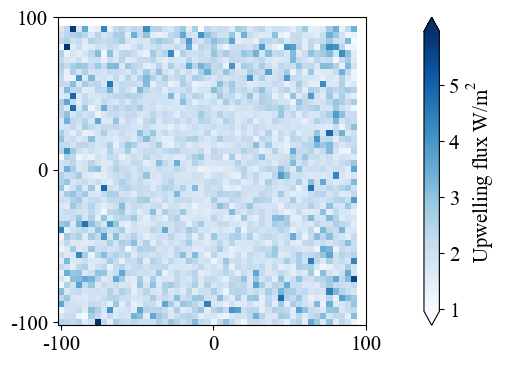

In [298]:
for i in range(1): #len(Fls)):
    results = np.load(file_dir +'/'+Fls[i],  allow_pickle=True).item()
    results.keys()
    uw_rxyz_M=results.get('uw_rxyz_M')
    uw_xyz_M=results.get('uw_xyz_M')

    F_uw_2D = uw_2D_pic(uw_xyz_M, uw_rxyz_M,theta[i],F_dw_os,len(nu),1000)
    print(np.sum(F_uw_2D)/np.sum(F_uw_2d_clsky))
    fig, (ax1) = plt.subplots(figsize=(15, 4), ncols=1) #,  ax3
    pos=ax1.imshow(F_uw_2D/F_uw_2d_clsky, cmap='Blues', origin="lower")#,norm=colors.LogNorm())
    cbar = fig.colorbar(pos, ax=ax1, extend='both') #shrink=0.7)
    cbar.set_label('Upwelling flux W/m$^2$')
    ax1.set_xticks([0,25,50])
    ax1.set_xticklabels(['-100','0','100'])
    ax1.set_yticks([0,25,50])
    ax1.set_yticklabels(['-100','0','100'])
    
#     #Theta = angularDstb(uw_rxyz_new,theta[0])
#     Theta = angularDstb(uw_rxyz_M,theta[0])

#     # Compute KDE
#     y = np.array(Theta).reshape(-1)
#     print(np.min(y),np.max(y))
#     kde = gaussian_kde(y)
#     x = np.linspace(0,90,100)
#     density = kde(x)
#     ax2.plot(x, density, label=r'$\theta_0$ = {:.2f}'.format(theta[i]))
#     ax2.scatter(x, density, s=10)
#     #ax2.hist(density, bins=30, density=True, alpha=0.5, label='Histogram')
#     ax2.set_xlabel(r'Phi [$\degree$]')
#     ax2.set_ylabel('Density')
#     #ax2.set_yscale('log')
#     plt.legend(loc='best',ncol=2)
    plt.show()
#calculateF(uw_rxyz_new)

### 3. F_uw_2d / F_csky_total

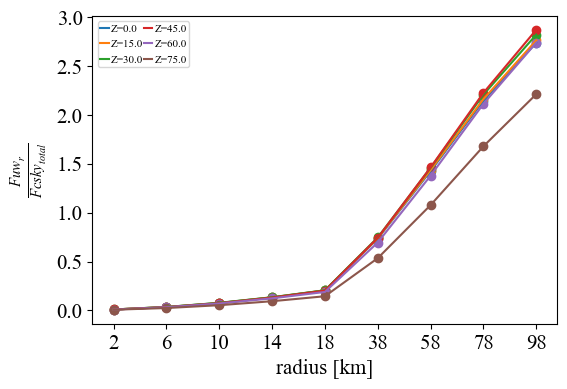

In [319]:
rindex_v = [0, 5, 10, 15, 20,21,22,23,24][::-1]
radius = np.arange(-98,98+4,4)
fig, (ax1) = plt.subplots(figsize=(6, 4), ncols=1)

for i in range(len(Fls)):
    results = np.load(file_dir +'/'+Fls[i],  allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    uw_xyz_M=results.get('uw_xyz_M')
    F_uw_2D = uw_2D_pic(uw_xyz_M, uw_rxyz_M,theta[i],F_dw_os,len(nu),1000)
    
    results = np.load(file_dir +'/'+Fls2[i],  allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    F_uw_csky=calculateF(uw_rxyz_M,theta[i])
    #uw_xyz_M=results.get('uw_xyz_M')

    #F_uw_2d_clsky = uw_2D_pic(uw_xyz_M, uw_rxyz_M,theta[i],F_dw_os,len(nu),1000)

    perct = []
    for j in range(len(rindex_v)):
        r = rindex_v[j]
        Fcod=F_uw_2D[r:50-r,r:50-r]
        #Fcsky=F_uw_2d_clsky[r:50-r,r:50-r]
        #frac=np.sum(Fcod)/np.sum(Fcsky)
        frac=np.sum(Fcod)/F_uw_csky
        perct.append(frac)
    ax1.scatter(np.arange(len(rindex_v)),perct)
    ax1.plot(np.arange(len(rindex_v)),perct,label=f'Z={theta[i]}')
ax1.set_xticks(np.arange(0,9,1))
ax1.set_xticklabels(radius[49-np.array(rindex_v)])
ax1.set_xlabel('radius [km]')
ax1.set_ylabel(r'$\frac{Fuw_{r}}{Fcsky_{total}}$')
plt.legend(prop={'size':font},ncol=2,handlelength=0.8,
                           handletextpad=0.2,columnspacing=0.,borderpad=0.2)
# ax.legend(loc='upper center',prop={'size':font-4},ncol=2,handlelength=0.8,
#                            handletextpad=0.2,columnspacing=0.,borderpad=0.2,bbox_to_anchor=(1.03, 1.02))
plt.show()

0.6893997611167815


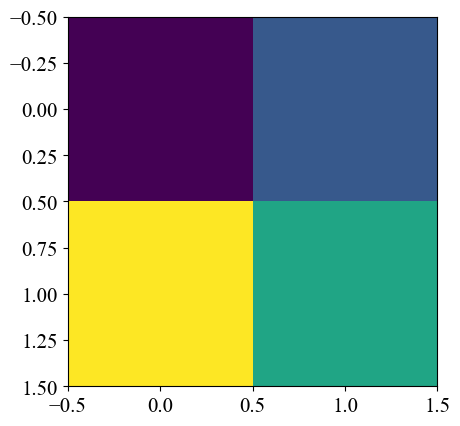

2.6214258247912166


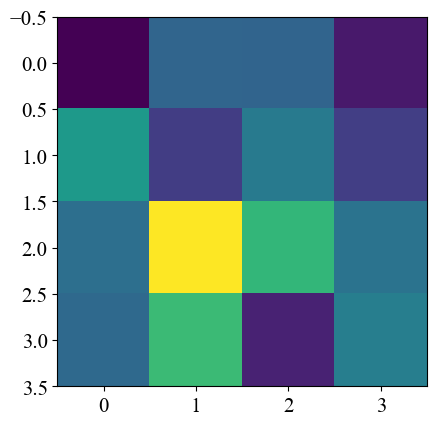

5.843606951507193


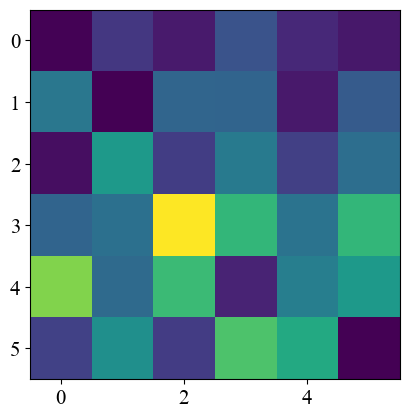

10.387945813378604


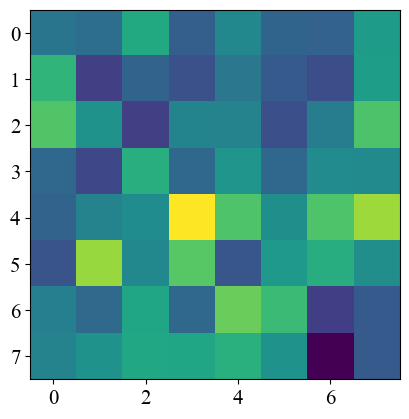

16.03796697599043


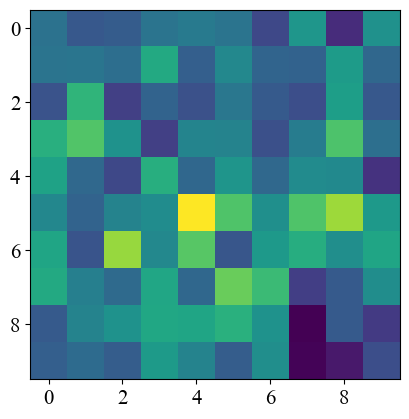

59.39401659722216


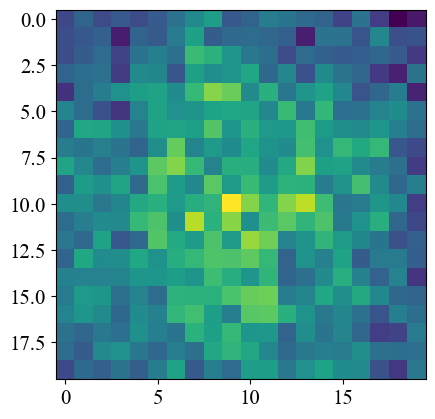

119.84784042410323


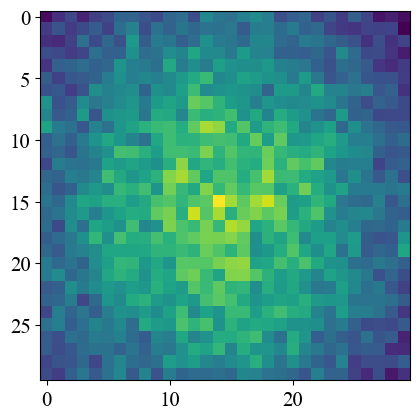

186.7842034037775


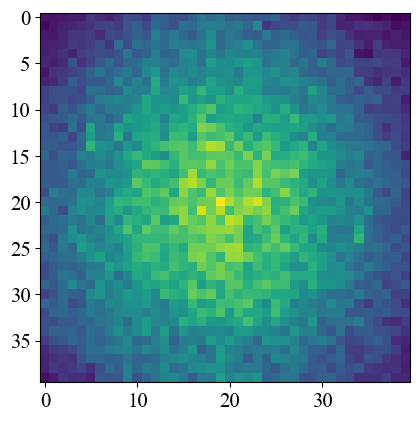

246.1364056632297


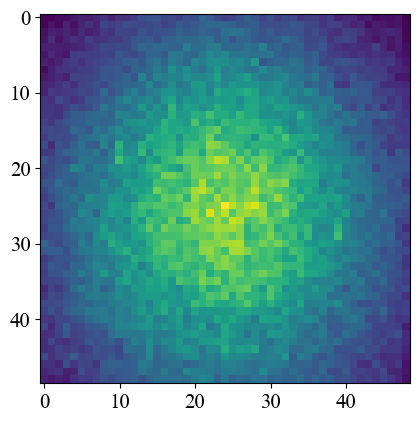

In [328]:
for j in range(len(rindex_v)):
    r = rindex_v[j]
    Fcod=F_uw_2D[r:50-r,r:50-r]
    print(np.sum(Fcod))
    plt.imshow(Fcod)
    plt.show()

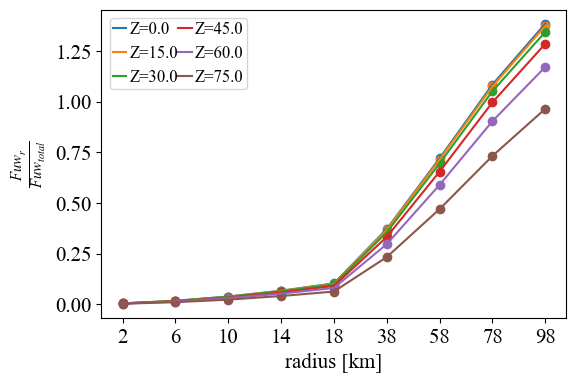

In [321]:
rindex_v = [0, 5, 10, 15, 20,21,22,23,24][::-1]
radius = np.arange(-98,98+4,4)
fig, (ax1) = plt.subplots(figsize=(6, 4), ncols=1)

for i in range(len(Fls)):
    results = np.load(file_dir +'/'+Fls[i],allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    uw_xyz_M=results.get('uw_xyz_M')
    F_uw_2D = uw_2D_pic(uw_xyz_M, uw_rxyz_M,theta[i],F_dw_os,len(nu),1000)
    
    #results = np.load(file_dir +'/'+Fls2[i],  allow_pickle=True).item()
    #uw_rxyz_M=results.get('uw_rxyz_M')
    F_uw_csky=calculateF(uw_rxyz_M,theta[i])
    #uw_xyz_M=results.get('uw_xyz_M')

    #F_uw_2d_clsky = uw_2D_pic(uw_xyz_M, uw_rxyz_M,theta[i],F_dw_os,len(nu),1000)

    perct = []
    for j in range(len(rindex_v)):
        r = rindex_v[j]
        Fcod=F_uw_2D[r:50-r,r:50-r]
        #Fcsky=F_uw_2d_clsky[r:50-r,r:50-r]
        #frac=np.sum(Fcod)/np.sum(Fcsky)
        frac=np.sum(Fcod)/F_uw_csky
        perct.append(frac)
    ax1.scatter(np.arange(len(rindex_v)),perct)
    ax1.plot(np.arange(len(rindex_v)),perct,label=f'Z={theta[i]}')
ax1.set_xticks(np.arange(0,9,1))
ax1.set_xticklabels(radius[49-np.array(rindex_v)])
ax1.set_xlabel('radius [km]')
ax1.set_ylabel(r'$\frac{Fuw_{r}}{Fuw_{total}}$')
plt.legend(prop={'size':font},ncol=2,handlelength=0.8,
                           handletextpad=0.2,columnspacing=0.,borderpad=0.2)
# ax.legend(loc='upper center',prop={'size':font-4},ncol=2,handlelength=0.8,
#                            handletextpad=0.2,columnspacing=0.,borderpad=0.2,bbox_to_anchor=(1.03, 1.02))
plt.show()

In [202]:
calculateF(uw_rxyz_new)

# clear sky

0.205384480275342


0.205384480275342

# Do not care about radius 

In [76]:
file_dir = "./results_shortwave/SWSCOPE"
Fls = os.listdir(file_dir)
#targetregex = re.compile(r"Results_case2_COD=(\d+\.?\d*)_Tsurf=300_AOD=0\.0_COD=0\.0_th0=")
Fls = [f for f in Fls if f.startswith('UWxyzr_COD=10.0')]
Fls = np.sort(Fls)
Fls

array(['UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=0.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=15.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=30.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=45.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=75.npy'], dtype='<U41')

In [5]:
file_dir = "./results_shortwave/SWSCOPE"
Fls = os.listdir(file_dir)
#targetregex = re.compile(r"Results_case2_COD=(\d+\.?\d*)_Tsurf=300_AOD=0\.0_COD=0\.0_th0=")
Fls3 = [f for f in Fls if f.startswith('UWxyzr_COD=1.0')]
Fls3 = np.sort(Fls3)
Fls3

array(['UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=0.npy',
       'UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=15.npy',
       'UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=30.npy',
       'UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=45.npy',
       'UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=75.npy'], dtype='<U40')

In [7]:
file_dir = "./results_shortwave/SWSCOPE"
Fls2 = os.listdir(file_dir)
#targetregex = re.compile(r"Results_case2_COD=(\d+\.?\d*)_Tsurf=300_AOD=0\.0_COD=0\.0_th0=")
Fls2 = [f for f in Fls2 if f.startswith('UWxyzr_COD=0.0')]
Fls2 = np.sort(Fls2)
Fls2

array(['UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=0.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=15.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=30.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=45.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=75.npy'], dtype='<U40')

In [ ]:
file_dir = "./results_shortwave/SWSCOPE"
fls = 'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=0.npy'
#fls = 'UWxyzr_COD=10_kap=[8, 9, 10, 11, 12, 13, 14, 15, 16]_th0=30.npy'
results = np.load(file_dir +'/'+fls,  allow_pickle=True).item()
Mrxyz = results.get('uw_rxyz_M')
N_bundles = 1000
testmode = 'all'
theta0 = 0

vmax = 1.5
Z0=polar_contour(vmax, theta0, Mrxyz, nu, F_dw_os, N_bundles, testmode, True)

In [78]:
COD = []
theta = []
for string in Fls:
    match = re.search(r'COD=([\d.]+)_', string)
    if match:
        number = float(match.group(1))
        COD.append(number)
    match = re.search(r'th0=([\d.]+).npy', string)
    if match:
        number = float(match.group(1))
        theta.append(number)

In [ ]:
rindex_v = [0, 5, 10, 15, 20,21,22,23,24][::-1]
radius = np.arange(-98,98+4,4)
testmode = 'all'

### clear sky intensity

In [79]:
theta

[0.0, 15.0, 30.0, 45.0, 60.0, 75.0]

0.0
2.435144484388689
0.0003579466490254258


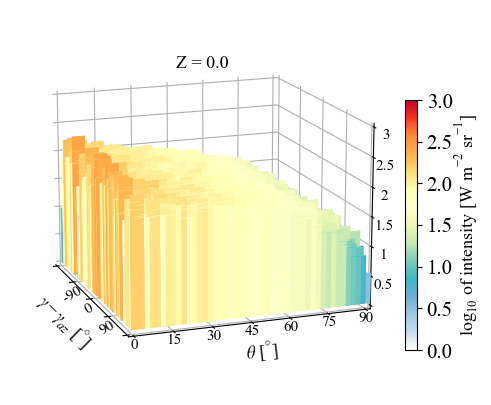

0.02827227111274422
2.4285828756453425
0.00034718981430200026


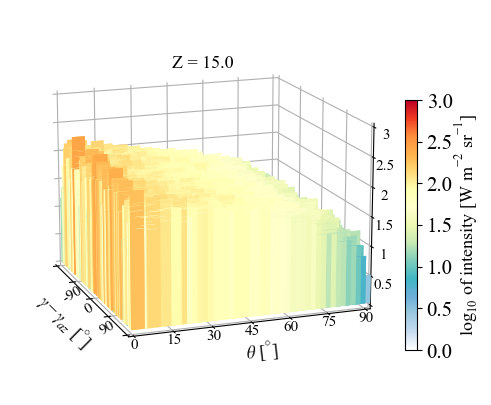

0.0
2.3587433173199575
0.0003432860605021392


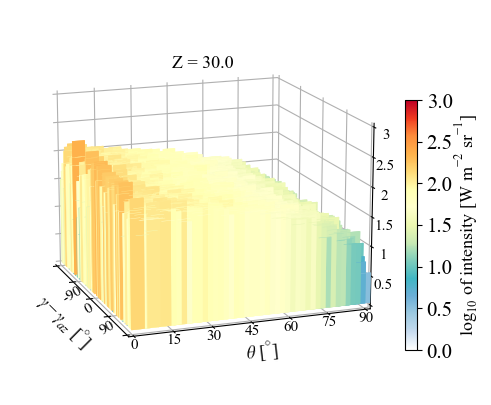

0.0
2.404580251488267
0.000334231680952178


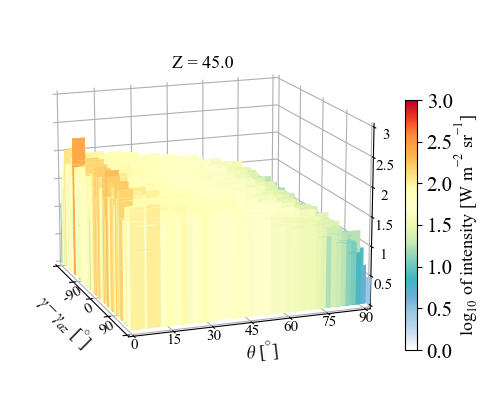

0.0
2.132374258788537
0.00033753928555999566


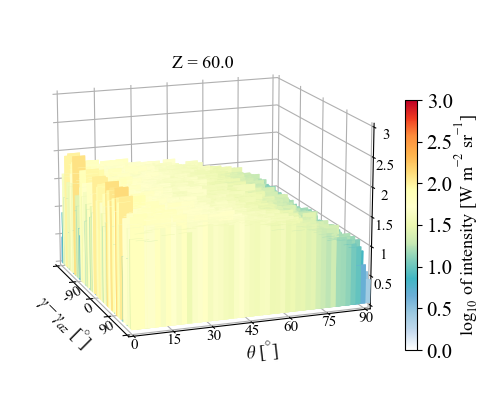

0.0
1.8646042315769544
0.0003475572410469044


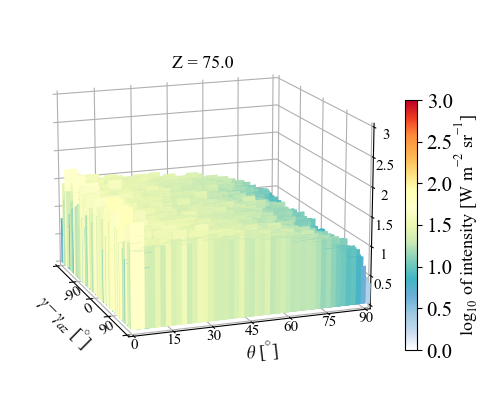

In [40]:
## COD=0
N_bundles = 1000
testmode = 'all'
phi0=0
for i in range(len(Fls2)):
    results = np.load(file_dir +'/'+Fls2[i],  allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    #uw_xyz_M=results.get('uw_xyz_M')
    theta0 = theta[i]
    #Mrxyz = uw_2D_pic(uw_xyz_M, uw_rxyz_M,theta[i],F_dw_os,len(nu),1000,True,r=98)
    vmax = 3 # work for intensity too
    plot_3D_AngDist(vmax, COD[i], theta0, phi0, uw_rxyz_M, nu, F_dw_os, N_bundles, testmode, False, Norm=False)
    #polar_contour(vmax, theta0, uw_rxyz_M, nu, F_dw_os, N_bundles, testmode, is_flux=False, Norm=False)

Total flux =  4025.011999999877 W/m2
mean F 0.810955508271234
max F 2.0691054829542415
---------


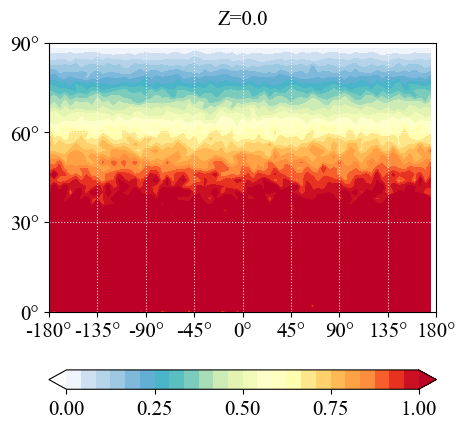

Total flux =  3966.8815700688283 W/m2
mean F 0.7955675205126457
max F 1.9077568586062825
---------


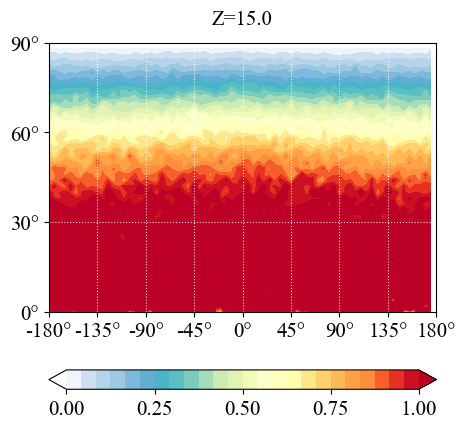

Total flux =  3767.796805660686 W/m2
mean F 0.748567200948357
max F 1.8570578353970628
---------


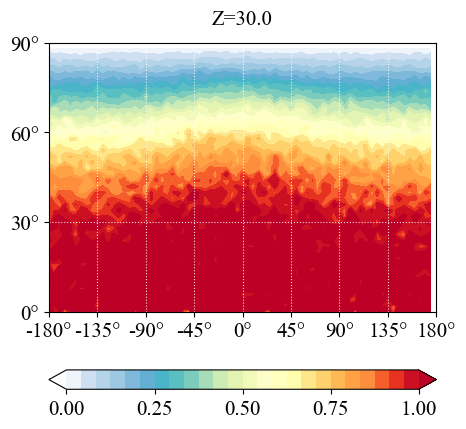

Total flux =  3369.6211992223352 W/m2
mean F 0.6530179646839606
max F 1.6758899387853463
---------


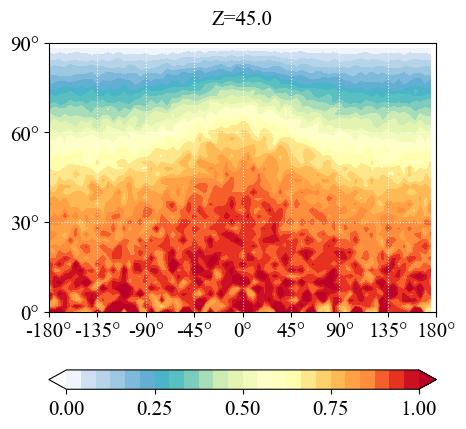

Total flux =  2645.8539999998884 W/m2
mean F 0.49352367336940156
max F 1.0157426916320822
---------


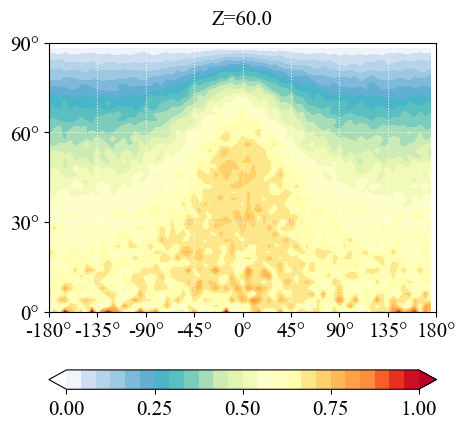

Total flux =  1520.8662611743055 W/m2
mean F 0.2644998131783611
max F 0.5377567779250504
---------


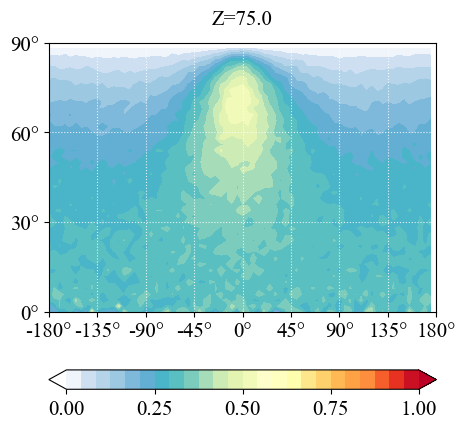

In [88]:
COD=10
phi0=0
for i in range(len(Fls)):
    results = np.load(file_dir +'/'+Fls[i],  allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    #uw_xyz_M=results.get('uw_xyz_M')
    theta0 = theta[i]
    #Mrxyz = uw_2D_pic(uw_xyz_M, uw_rxyz_M,theta[i],F_dw_os,len(nu),1000,True,r=98)
    vmax = 1
    #plot_3D_AngDist(vmax, COD, theta0, phi0, uw_rxyz_M, nu, F_dw_os, N_bundles, testmode, False, Norm=False)
    polar_contour(vmax, COD, theta0, uw_rxyz_M, nu, F_dw_os, N_bundles, testmode, False,True)
#calculateF(uw_rxyz_new)

In [85]:
np.arange(-180, 180+45, 45)

array([-180, -135,  -90,  -45,    0,   45,   90,  135,  180])

In [253]:
Fls3

array(['UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=0.npy',
       'UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=15.npy',
       'UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=30.npy',
       'UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=45.npy',
       'UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=75.npy'], dtype='<U40')

0.9011330508725678
2.3312935153850955
0.000296185668421375


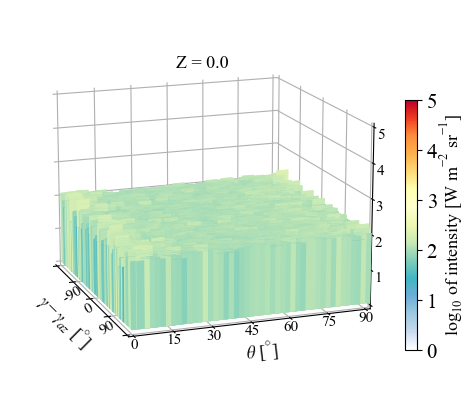

1.0316378742631975
2.356327515440278
0.0003532676083830764


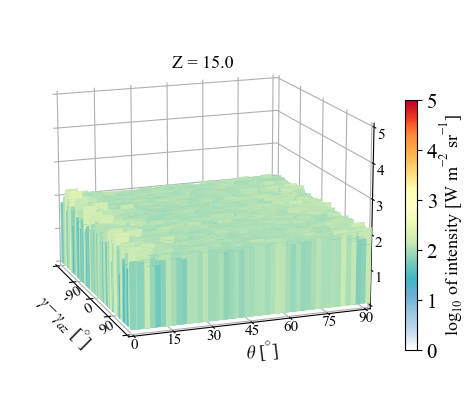

1.2327502615470785
2.4976343622951727
0.00028904943893081177


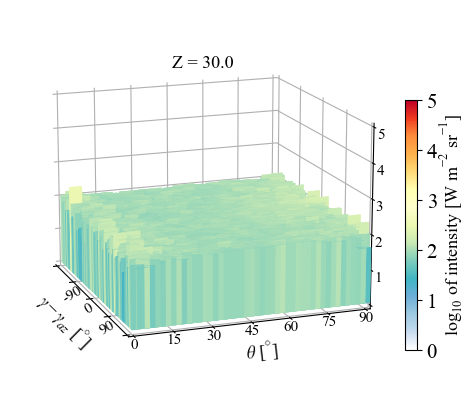

1.2385840103086136
2.327043848726864
0.0002642661998370596


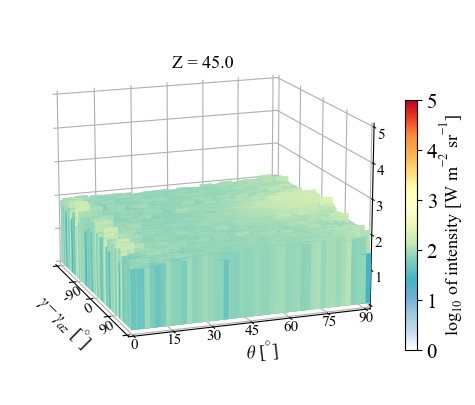

/tmp/ipykernel_1966628/2547483298.py:22: RuntimeWarning: divide by zero encountered in divide
  cosP = rx / sin_th  # in [0,pi]


1.195324697207143
2.4697987723781587
0.00022870229517447601


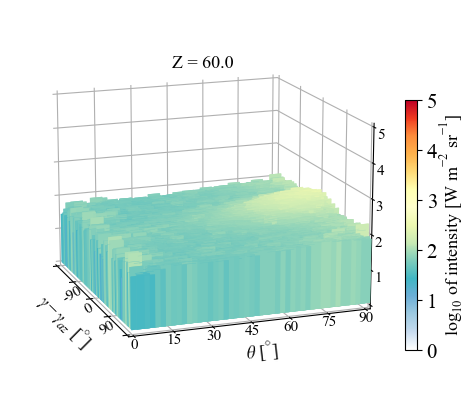

0.9371455636568408
2.769627231490789
0.0001626071334902111


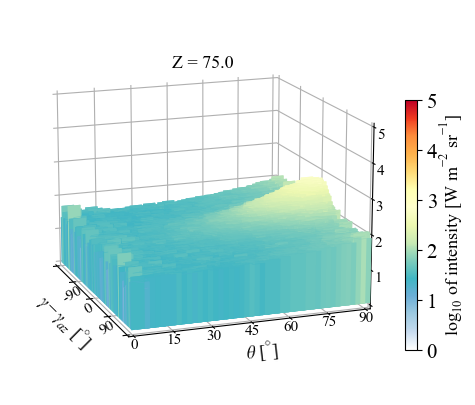

In [255]:
# COD=1
phi0=0
for i in range(len(Fls3)):
    results = np.load(file_dir +'/'+Fls3[i],  allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    #uw_xyz_M=results.get('uw_xyz_M')
    theta0 = theta[i]
    #Mrxyz = uw_2D_pic(uw_xyz_M, uw_rxyz_M,theta[i],F_dw_os,len(nu),1000,True,r=98)
    vmax = 3 # work for intensity too
    plot_3D_AngDist(vmax, COD[1], theta0, phi0, uw_rxyz_M, nu, F_dw_os, N_bundles, testmode, False, Norm=False)

In [260]:
filename ='Results_case2_RH=0.0_Tsurf=290_AOD=0.0_COD=0.5_kap=[8, 9, 10]_th0=30.npy'
results = np.load(file_dir +'/'+filename,  allow_pickle=True).item()
dw=results.get('F_dw')

In [276]:
np.trapz(dw[-2,:],nu)

1165.0321140394947

In [272]:
np.trapz(F_dw_os,nu)

1346.634727804059

### Archieved

In [436]:
Fls

array(['UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=0.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=15.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=30.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=45.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=75.npy'], dtype='<U41')

In [437]:
theta

[0.0, 15.0, 30.0, 45.0, 60.0, 75.0]

Total flux =  262.81546182487347 W/m2
mean F 28.475155813535228
max F 91.76911084797403
---------


/tmp/ipykernel_1871562/4211528216.py:33: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0,1e6)


Total flux =  256.9102333481786 W/m2
mean F 27.826086878648027
max F 84.73024264722824
---------
Total flux =  238.6691854158031 W/m2
mean F 25.86599876506153
max F 80.11086303815543
---------
Total flux =  204.3065724398483 W/m2
mean F 21.89898880025213
max F 76.35611875193304
---------
Total flux =  146.20146633148994 W/m2
mean F 15.56796460209516
max F 46.32461315273803
---------
Total flux =  69.11277648442744 W/m2
mean F 7.249618206541765
max F 24.60150227642945
---------


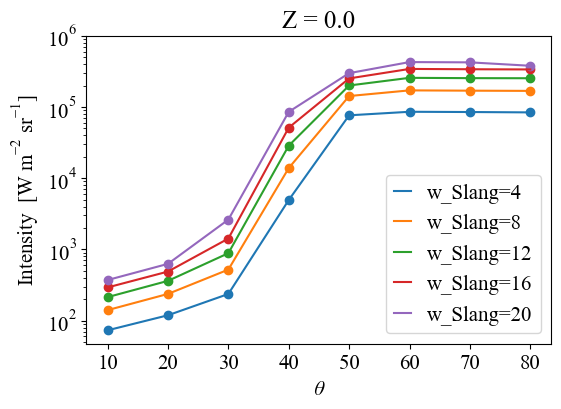

<Figure size 500x500 with 0 Axes>

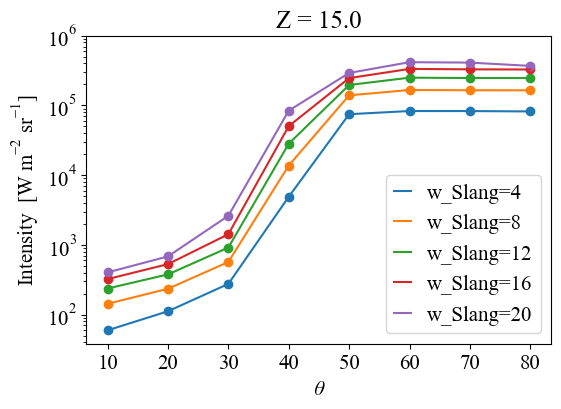

<Figure size 500x500 with 0 Axes>

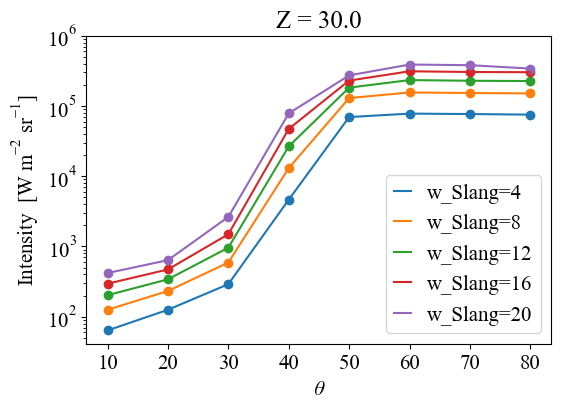

<Figure size 500x500 with 0 Axes>

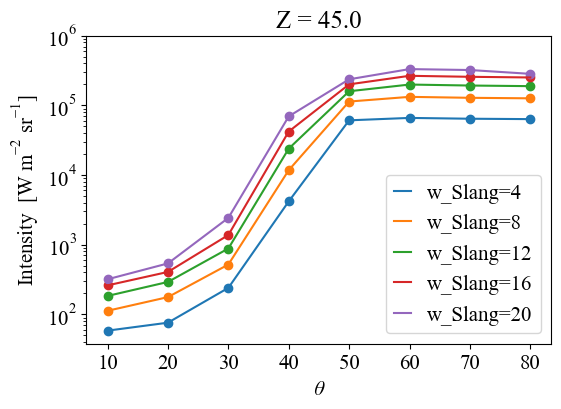

<Figure size 500x500 with 0 Axes>

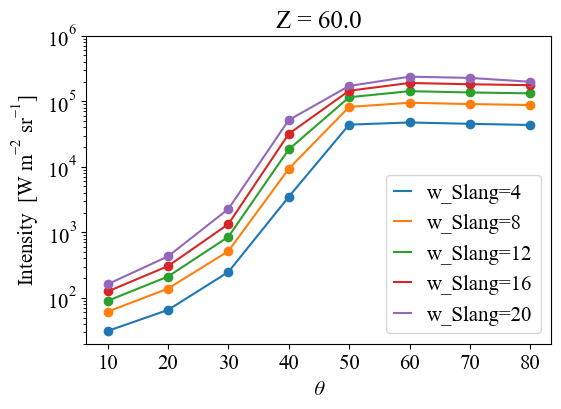

<Figure size 500x500 with 0 Axes>

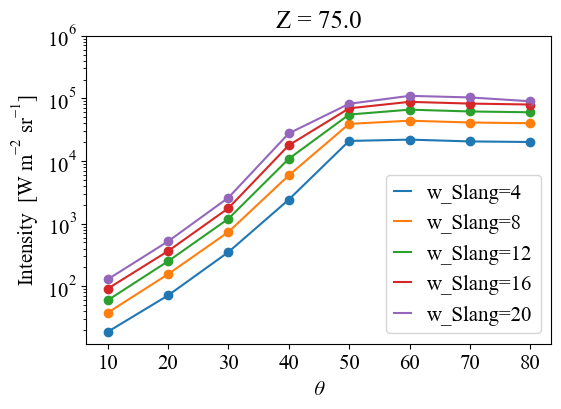

<Figure size 500x500 with 0 Axes>

In [475]:
for i in range(len(Fls)):
    fig, (ax1) = plt.subplots(figsize=(6, 4), ncols=1)
    results = np.load(file_dir +'/'+Fls[i], allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    uw_xyz_M=results.get('uw_xyz_M')
    theta0 = theta[i]
    Mrxyz = uw_2D_pic(uw_xyz_M, uw_rxyz_M,theta[i],F_dw_os,len(nu),1000,True,r=98)
    vmax = 2
    H = polar_contour(vmax, theta0, Mrxyz, nu, F_dw_os, N_bundles, testmode,Z0_csky, False)
    #calculateF(uw_rxyz_new)

    d_th = 2
    d_phi = 5
    bins_theta = np.arange(0, 91, d_th)
    bins_phi = np.arange(-180, 181, d_phi)

    Hphi=np.trapz(H.T,bins_phi[:-1].T,axis=1)
    for d in [1,2,3,4,5]: # -+2,4,6,8,10 degree
        In=[]
        for j in index_theta:
            try:
                intensity=np.trapz(Hphi[j-d:j+1+d],bins_theta[j-d:j+1+d])
            except(Exception):
                intensity=np.trapz(Hphi[j-d:j+1+d],bins_theta[j-d:j+d])
            In.append(intensity)
        ax1.scatter(bins_theta[index_theta],In)
        ax1.plot(bins_theta[index_theta],In,label=f'w_Slang={4*d}')#label=f'Z = {theta[i]}')
    ax1.set_yscale('log')
    ax1.set_xticks(bins_theta[index_theta])
    ax1.set_xlabel(r'$\theta$')
    ax1.set_title(f'Z = {theta[i]}')
    ax1.set_ylabel(r'Intensity  [W m$^{-2}$ sr$^{-1}$]')
    ax1.set_ylim(0,1e6)
    ax1.legend(handlelength=0.8)
plt.show()

In [480]:
bins_phi[35:38]

array([-5,  0,  5])

Total flux =  262.81546182487347 W/m2
mean F 28.475155813535228
max F 91.76911084797403
---------
Total flux =  256.9102333481786 W/m2
mean F 27.826086878648027
max F 84.73024264722824
---------
Total flux =  238.6691854158031 W/m2
mean F 25.86599876506153
max F 80.11086303815543
---------
Total flux =  204.3065724398483 W/m2
mean F 21.89898880025213
max F 76.35611875193304
---------
Total flux =  146.20146633148994 W/m2
mean F 15.56796460209516
max F 46.32461315273803
---------
Total flux =  69.11277648442744 W/m2
mean F 7.249618206541765
max F 24.60150227642945
---------


/tmp/ipykernel_1871562/3785888795.py:29: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0,1e6)


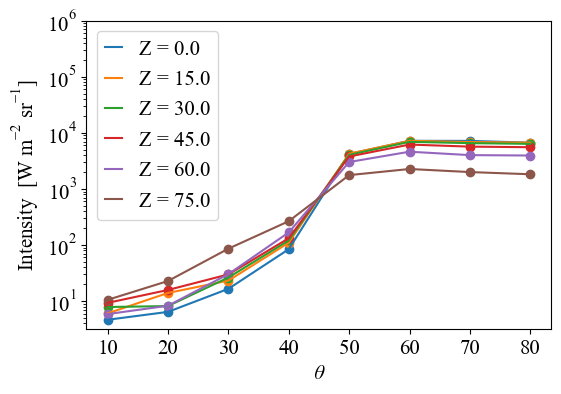

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [483]:
fig, (ax1) = plt.subplots(figsize=(6, 4), ncols=1)
for i in range(len(Fls)):
    results = np.load(file_dir +'/'+Fls[i], allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    uw_xyz_M=results.get('uw_xyz_M')
    theta0 = theta[i]
    Mrxyz = uw_2D_pic(uw_xyz_M, uw_rxyz_M,theta[i],F_dw_os,len(nu),1000,True,r=98)
    vmax = 2
    H = polar_contour(vmax, theta0, Mrxyz, nu, F_dw_os, N_bundles, testmode,Z0_csky, False)
    #calculateF(uw_rxyz_new)

    d_th = 2
    d_phi = 5
    bins_theta = np.arange(0, 91, d_th)
    bins_phi = np.arange(-180, 181, d_phi)

    Hphi=np.trapz(H[35:38,:].T,bins_phi[35:38].T,axis=1)
    d=3 # -+2,4,6,8,10 degree
    In=[]
    for j in index_theta:
        try:
            intensity=np.trapz(Hphi[j-d:j+1+d],bins_theta[j-d:j+1+d])
        except(Exception):
            intensity=np.trapz(Hphi[j-d:j+1+d],bins_theta[j-d:j+d])
        In.append(intensity)
    ax1.scatter(bins_theta[index_theta],In)
    ax1.plot(bins_theta[index_theta],In,label=f'Z = {theta[i]}')
ax1.set_yscale('log')
ax1.set_ylim(0,1e6)
ax1.set_xticks(bins_theta[index_theta])
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'Intensity  [W m$^{-2}$ sr$^{-1}$]')
ax1.legend(handlelength=0.8)
plt.show()

Total flux =  262.81546182487347 W/m2
mean F 28.475155813535228
max F 91.76911084797403
---------
Total flux =  256.9102333481786 W/m2
mean F 27.826086878648027
max F 84.73024264722824
---------
Total flux =  238.6691854158031 W/m2
mean F 25.86599876506153
max F 80.11086303815543
---------
Total flux =  204.3065724398483 W/m2
mean F 21.89898880025213
max F 76.35611875193304
---------
Total flux =  146.20146633148994 W/m2
mean F 15.56796460209516
max F 46.32461315273803
---------
Total flux =  69.11277648442744 W/m2
mean F 7.249618206541765
max F 24.60150227642945
---------


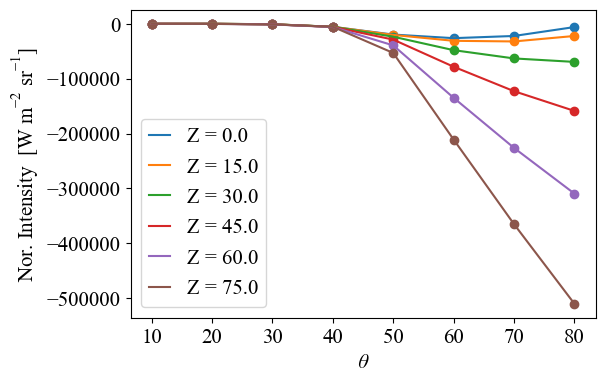

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [485]:
fig, (ax1) = plt.subplots(figsize=(6, 4), ncols=1)
for i in range(len(Fls)):
    results = np.load(file_dir +'/'+Fls[i], allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    uw_xyz_M=results.get('uw_xyz_M')
    theta0 = theta[i]
    Mrxyz = uw_2D_pic(uw_xyz_M, uw_rxyz_M,theta[i],F_dw_os,len(nu),1000,True,r=98)
    vmax = 2
    H = polar_contour(vmax, theta0, Mrxyz, nu, F_dw_os, N_bundles, testmode,Z0_csky, False)
    #H=H/H_clearsky
    ind = np.isnan(H)
    #H = H[~ind]
    #calculateF(uw_rxyz_new)

    d_th = 2
    d_phi = 5
    bins_theta = np.arange(0, 91, d_th)
    bins_phi = np.arange(-180, 181, d_phi)
    Hphi_csky = np.trapz(H_clearsky.T,bins_phi[:-1].T,axis=1)
    Hphi=np.trapz(H.T,bins_phi[:-1].T,axis=1)

    In=[]
    for j in index_theta:
        intensity=np.trapz(Hphi[:j],bins_theta[:j])
        intensity_csky=np.trapz(Hphi_csky[:j],bins_theta[:j])
        In.append(intensity-intensity_csky)
    ax1.scatter(bins_theta[index_theta],In)
    ax1.plot(bins_theta[index_theta],In,label=f'Z = {theta[i]}')

#ax1.set_yscale('log')
ax1.set_xticks(bins_theta[index_theta])
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'Nor. Intensity  [W m$^{-2}$ sr$^{-1}$]')
ax1.legend(handlelength=1.0)
plt.show()

### mini test flux, intensity, norm intensity

In [123]:
file_dir = "./results_shortwave/SWSCOPE"
#fls = 'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=30.npy'
fls = 'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=75.npy'
results = np.load(file_dir +'/'+fls,  allow_pickle=True).item()
Mrxyz = results.get('uw_rxyz_M')
N_bundles = 1000
testmode = 'all'
theta0 = 75
vmax = 5

(72, 90)
Total flux =  480868.2987847262 W/m2
mean F 1.8066798555081824
max F 2.837796740910206
---------


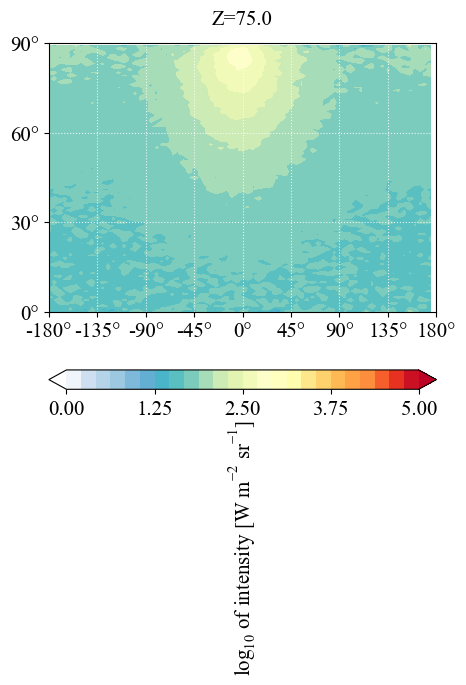

In [139]:
H = polar_contour(5, 10, theta0, Mrxyz, nu, F_dw_os, N_bundles, testmode, False, False) #is_flux=False, Norm=True

Total flux =  1520.8662611743055 W/m2
mean F 0.15409596974387746
max F 0.5104714051037058
---------


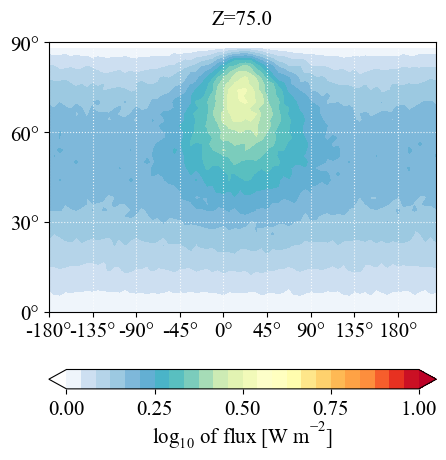

In [390]:
H = polar_contour(1, theta0, Mrxyz, nu, F_dw_os, N_bundles, testmode, True, True) #is_flux=False, Norm=True

Total flux =  214.9282297134168 W/m2
mean F 1.522270684874459
max F 1.9501181562310488
---------


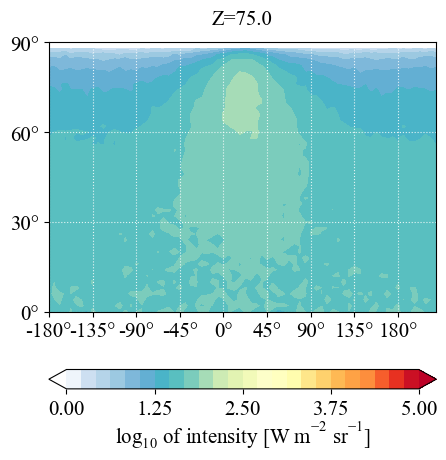

In [392]:
H = polar_contour(vmax, theta0, Mrxyz, nu, F_dw_os, N_bundles, testmode, False, False) #is_flux=False, Norm=True

### normalized

In [45]:
file_dir = "./results_shortwave/SWSCOPE"
Fls = os.listdir(file_dir)
#targetregex = re.compile(r"Results_case2_COD=(\d+\.?\d*)_Tsurf=300_AOD=0\.0_COD=0\.0_th0=")
Fls = [f for f in Fls if f.startswith('UWxyzr_COD=')]
Fls = [f for f in Fls if f.endswith('60.npy')]
Fls = np.sort(Fls)
Fls

array(['UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=0.5_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=5.0_kap=[8, 9, 10]_th0=60.npy'], dtype='<U41')

In [46]:
COD = []
theta = []
for string in Fls:
    match = re.search(r'COD=([\d.]+)_', string)
    if match:
        number = float(match.group(1))
        COD.append(number)
    match = re.search(r'th0=([\d.]+).npy', string)
    if match:
        number = float(match.group(1))
        theta.append(number)
COD

[0.0, 0.5, 1.0, 10.0, 5.0]

In [47]:
Fls = Fls[np.argsort(COD)]
COD = np.sort(COD)

Total flux =  1193.4984999999951 W/m2
mean F 0.22557097835925494
max F 0.7618070187240616
---------


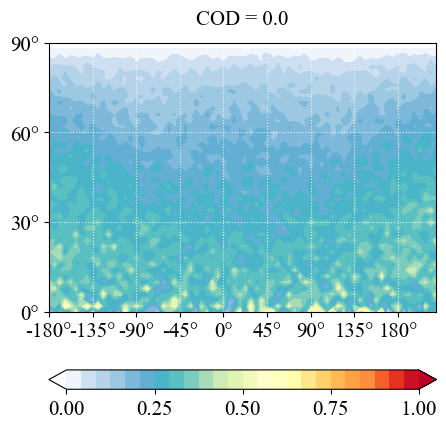

Total flux =  1372.0319999999854 W/m2
mean F 0.25016462128900663
max F 0.7147818941114652
---------


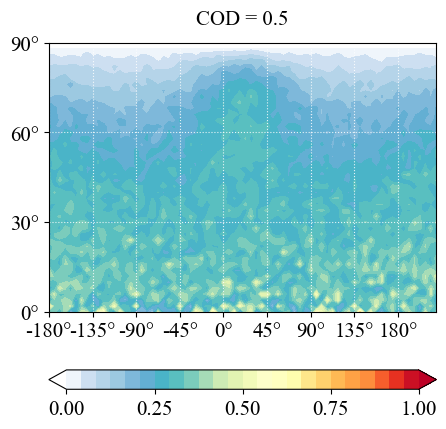

Total flux =  1548.6479999999726 W/m2
mean F 0.27671463358199405
max F 0.6677567694988688
---------


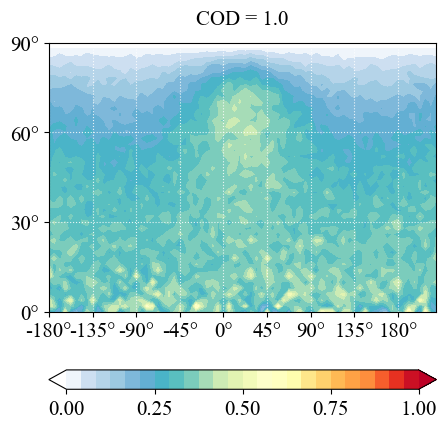

Total flux =  2266.044499999918 W/m2
mean F 0.41052914376449817
max F 0.9122874174843701
---------


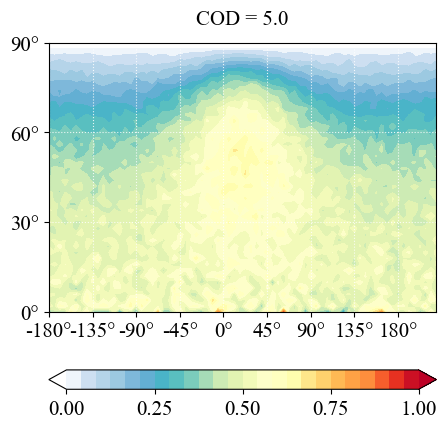

Total flux =  2645.8539999998884 W/m2
mean F 0.49352367336940156
max F 1.0157426916320822
---------


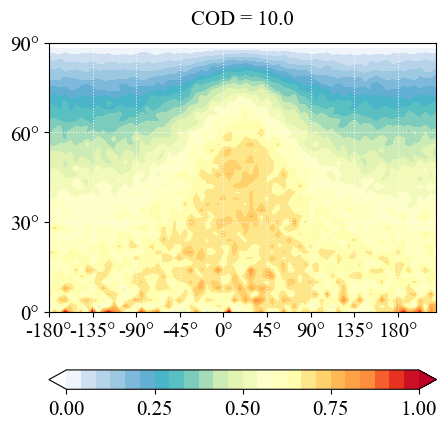

In [67]:
phi0=0
for i in range(len(Fls)):
    results = np.load(file_dir +'/'+Fls[i],  allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    #uw_xyz_M=results.get('uw_xyz_M')
    theta0 = theta[i]
    vmax = 1
    #plot_3D_AngDist(vmax, COD[i], theta0, phi0, uw_rxyz_M, nu, F_dw_os, N_bundles, testmode, False, True)
    polar_contour(vmax,COD[i], theta0, uw_rxyz_M, nu, F_dw_os, N_bundles, testmode, is_flux=False, Norm=True)

## 1D angle distribution

In [320]:
file_dir = "./results_shortwave/SWSCOPE"
Fls = os.listdir(file_dir)
#targetregex = re.compile(r"Results_case2_COD=(\d+\.?\d*)_Tsurf=300_AOD=0\.0_COD=0\.0_th0=")
Fls = [f for f in Fls if f.startswith('UWxyzr_COD=10.0')]
Fls = np.sort(Fls)
Fls

array(['UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=0.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=15.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=30.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=45.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=75.npy'], dtype='<U41')

In [321]:
file_dir = "./results_shortwave/SWSCOPE"
Fls2 = os.listdir(file_dir)
#targetregex = re.compile(r"Results_case2_COD=(\d+\.?\d*)_Tsurf=300_AOD=0\.0_COD=0\.0_th0=")
Fls2 = [f for f in Fls2 if f.startswith('UWxyzr_COD=0.0')]
Fls2 = np.sort(Fls2)
Fls2

array(['UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=0.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=15.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=30.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=45.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=75.npy'], dtype='<U40')

In [323]:
COD = []
theta = []
for string in Fls2:
    match = re.search(r'COD=([\d.]+)_', string)
    if match:
        number = float(match.group(1))
        COD.append(number)
    match = re.search(r'th0=([\d.]+).npy', string)
    if match:
        number = float(match.group(1))
        theta.append(number)
#COD
theta

[0.0, 15.0, 30.0, 45.0, 60.0, 75.0]

In [20]:
N_bundles = 1000
testmode = 'all'
theta0 = 75
vmax = 5
phi0=0

#### clear angle

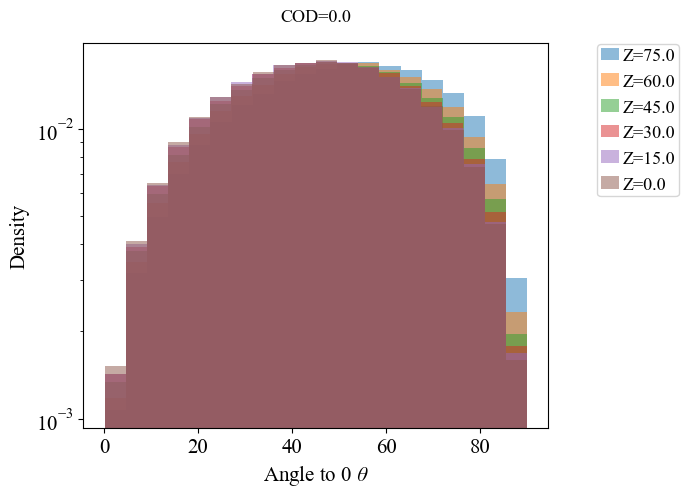

In [333]:
fig = plt.figure(figsize=(6, 5))#, dpi=300)
font=13
fontfml='Times New Roman'
gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=-0.1, hspace=0) # set the spacing between axes.
ax1 = fig.add_subplot(gs1[0, 0])
for i in range(len(Fls2)-1,-1,-1):
    results = np.load(file_dir +'/'+Fls2[i], allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    #uw_xyz_M=results.get('uw_xyz_M')
    theta0 = theta[i]
    result = angularDstb(vmax, COD, theta0, phi0, uw_rxyz_M,nu, F_dw_os, N_bundles,
                    testmode, is_flux=False,Norm=False)
    result = np.concatenate(result)
    
    ax1.hist(result,bins=20, density=True, alpha=0.5,label=f'Z={theta0}')
    ax1.set_yscale('log')
    ax1.set_ylabel('Density')
    ax1.set_xlabel('Angle to 0 [$\\theta$]')
ax1.legend(loc='upper right',prop={'size':font},ncol=1,handlelength=1,
           handletextpad=0.2,columnspacing=0.,borderpad=0.2,bbox_to_anchor=(1.3, 1.02))
ax1.set_title(f'COD={COD[0]}',#Z={theta0}', 
                   x=0.5, y=1.15, fontsize=font, family=fontfml,pad=-26)
plt.show()

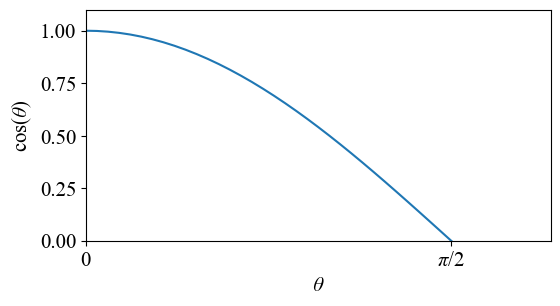

In [61]:
fig = plt.figure(figsize=(6,3))
x = np.linspace(-np.pi/2, np.pi, 100)
y = np.cos(x)
plt.plot(x, y)
plt.xticks([-np.pi/2, 0, np.pi/2, np.pi], ['$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
plt.xlabel('$\\theta$')
plt.ylim(0,1.1)
plt.xlim(0,2)
plt.ylabel('$\cos(\\theta)$')
plt.show()

In [340]:
Fls2

array(['UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=0.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=15.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=30.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=45.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=75.npy'], dtype='<U40')

In [341]:
theta

[0.0, 15.0, 30.0, 45.0, 60.0, 75.0]

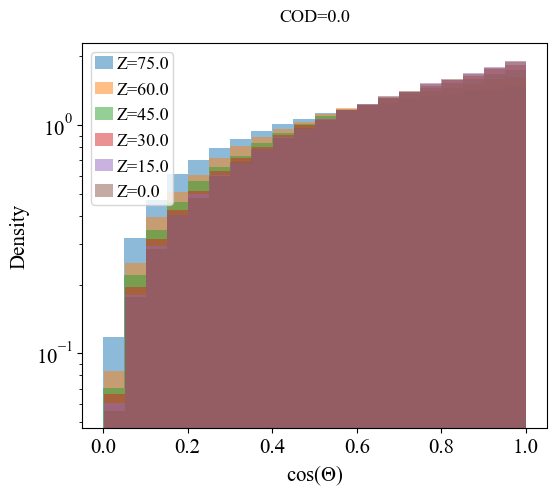

In [343]:
fig = plt.figure(figsize=(6, 5))#, dpi=300)
font=13
fontfml='Times New Roman'
gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=-0.1, hspace=0) # set the spacing between axes.
ax1 = fig.add_subplot(gs1[0, 0])
for i in range(len(Fls2)-1,-1,-1):
    results = np.load(file_dir +'/'+Fls2[i], allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    #uw_xyz_M=results.get('uw_xyz_M')
    theta0 = theta[i]
    result = angularDstb(vmax, COD, theta0, phi0, uw_rxyz_M,nu, F_dw_os, N_bundles,
                    testmode, is_flux=False,Norm=False)
    result = np.concatenate(result)
    Theta = abs(result)
    ax1.hist(np.cos(np.deg2rad(Theta)),bins=20, density=True, alpha=0.5,label=f'Z={theta0}')
    ax1.set_yscale('log')
    ax1.set_ylabel('Density')
    ax1.set_xlabel('$\\cos(\Theta)$')
ax1.legend(loc='upper left',prop={'size':font},ncol=1,handlelength=1,
           handletextpad=0.2,columnspacing=0.,borderpad=0.2)
ax1.set_title(f'COD={COD[0]}',#Z={theta0}', 
                   x=0.5, y=1.15, fontsize=font, family=fontfml,pad=-26)
plt.show()

#### COD=10 angle

In [338]:
Fls

array(['UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=0.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=15.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=30.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=45.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=75.npy'], dtype='<U41')

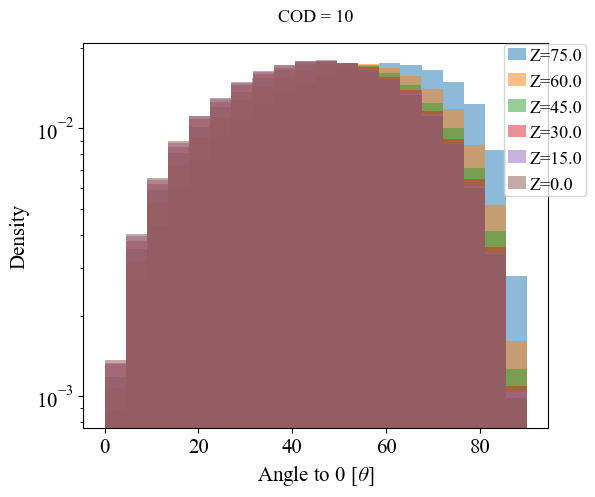

In [347]:
fig = plt.figure(figsize=(6, 5))#, dpi=300)
font=13
fontfml='Times New Roman'
gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=-0.1, hspace=0) # set the spacing between axes.
ax1 = fig.add_subplot(gs1[0, 0])
for i in range(len(Fls)-1,-1,-1):
    results = np.load(file_dir +'/'+Fls[i], allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    #uw_xyz_M=results.get('uw_xyz_M')
    theta0 = theta[i]
    result = angularDstb(vmax, COD, theta0, phi0, uw_rxyz_M,nu, F_dw_os, N_bundles,
                    testmode, is_flux=False,Norm=False)
    result = np.concatenate(result)
    
    ax1.hist(result,bins=20, density=True, alpha=0.5,label=f'Z={theta0}')
    ax1.set_yscale('log')
    ax1.set_ylabel('Density')
    ax1.set_xlabel('Angle to 0 [$\\theta$]')
ax1.legend(loc='upper right',prop={'size':font},ncol=1,handlelength=1,
           handletextpad=0.2,columnspacing=0.,borderpad=0.2,bbox_to_anchor=(1.1, 1.02))
ax1.set_title(f'COD = {10}',#Z={theta0}', 
                   x=0.5, y=1.15, fontsize=font, family=fontfml,pad=-26)
plt.show()

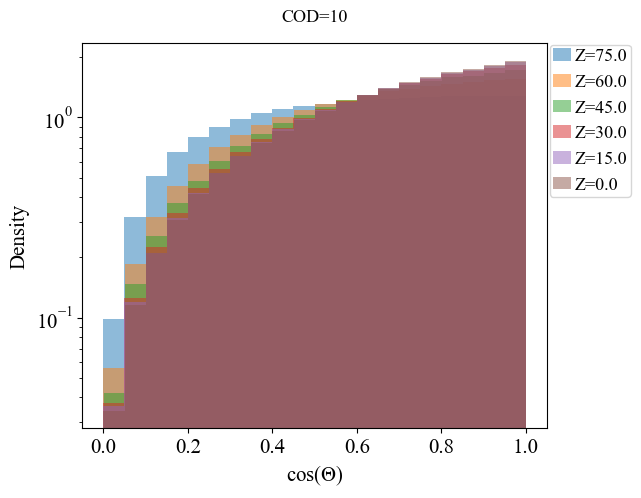

In [351]:
fig = plt.figure(figsize=(6, 5))#, dpi=300)
font=13
fontfml='Times New Roman'
gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=-0.1, hspace=0) # set the spacing between axes.
ax1 = fig.add_subplot(gs1[0, 0])
for i in range(len(Fls)-1,-1,-1):
    results = np.load(file_dir +'/'+Fls[i], allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    #uw_xyz_M=results.get('uw_xyz_M')
    theta0 = theta[i]
    result = angularDstb(vmax, COD, theta0, phi0, uw_rxyz_M,nu, F_dw_os, N_bundles,
                    testmode, is_flux=False,Norm=False)
    result =  np.concatenate(result)
    Theta = result
    ax1.hist(np.cos(np.deg2rad(Theta)),bins=20, density=True, alpha=0.5,label=f'Z={theta0}')
    ax1.set_yscale('log')
    ax1.set_ylabel('Density')
    ax1.set_xlabel('$\\cos(\Theta)$')
ax1.legend(loc='upper right',prop={'size':font},ncol=1,handlelength=1,
           handletextpad=0.2,columnspacing=0.,borderpad=0.2,bbox_to_anchor=(1.2, 1.02))
ax1.set_title(f'COD={10}',#Z={theta0}', 
                   x=0.5, y=1.15, fontsize=font, family=fontfml,pad=-26)
plt.show()

#### COD impact with same angle

In [355]:
file_dir = "./results_shortwave/SWSCOPE"
Fls = os.listdir(file_dir)
#targetregex = re.compile(r"Results_case2_COD=(\d+\.?\d*)_Tsurf=300_AOD=0\.0_COD=0\.0_th0=")
Fls = [f for f in Fls if f.startswith('UWxyzr_COD=')]
Fls = [f for f in Fls if f.endswith('60.npy')]
Fls = np.sort(Fls)
Fls

array(['UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=0.5_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=5.0_kap=[8, 9, 10]_th0=60.npy'], dtype='<U41')

In [356]:
COD = []
theta = []
for string in Fls:
    match = re.search(r'COD=([\d.]+)_', string)
    if match:
        number = float(match.group(1))
        COD.append(number)
    match = re.search(r'th0=([\d.]+).npy', string)
    if match:
        number = float(match.group(1))
        theta.append(number)
        
COD

[0.0, 0.5, 1.0, 10.0, 5.0]

In [357]:
Fls = Fls[np.argsort(COD)]
COD = np.sort(COD)

In [363]:
Fls

array(['UWxyzr_COD=0.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=0.5_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=1.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=5.0_kap=[8, 9, 10]_th0=60.npy',
       'UWxyzr_COD=10.0_kap=[8, 9, 10]_th0=60.npy'], dtype='<U41')

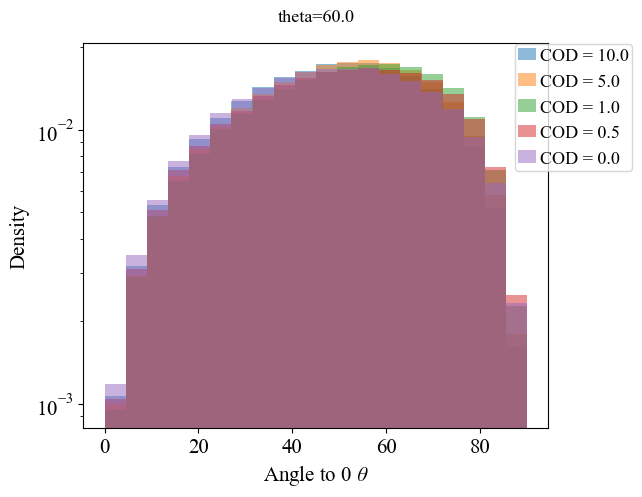

In [364]:
fig = plt.figure(figsize=(6, 5))#, dpi=300)
font=13
fontfml='Times New Roman'
gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=-0.1, hspace=0) # set the spacing between axes.
ax1 = fig.add_subplot(gs1[0, 0])
for i in range(len(Fls)-1,-1,-1):
    results = np.load(file_dir +'/'+Fls[i], allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    #uw_xyz_M=results.get('uw_xyz_M')
    theta0 = theta[i]
    result = angularDstb(vmax, COD, theta0, phi0, uw_rxyz_M,nu, F_dw_os, N_bundles,
                    testmode, is_flux=False,Norm=False)
    result = np.concatenate(result)
    
    ax1.hist(result,bins=20, density=True, alpha=0.5,label=f'COD = {COD[i]}')
    ax1.set_yscale('log')
    ax1.set_ylabel('Density')
    ax1.set_xlabel('Angle to 0 $\\theta$')
ax1.legend(loc='upper right',prop={'size':font},ncol=1,handlelength=1,
           handletextpad=0.2,columnspacing=0.,borderpad=0.2,bbox_to_anchor=(1.2, 1.02))
ax1.set_title(f'theta={theta0}',#Z={theta0}', 
                   x=0.5, y=1.15, fontsize=font, family=fontfml,pad=-26)
plt.show() 

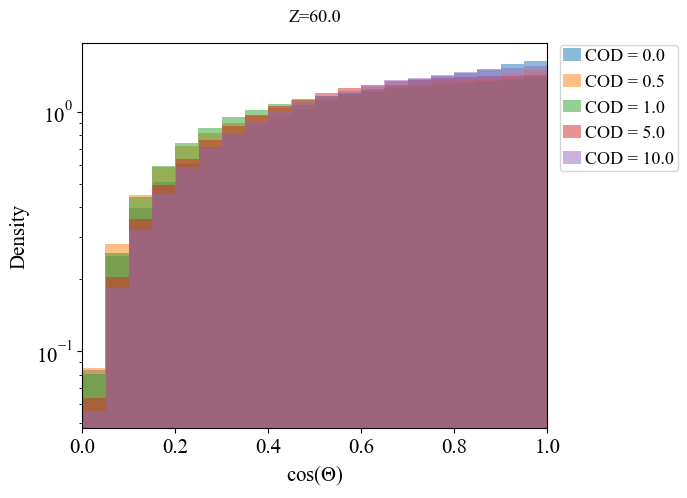

In [362]:
fig = plt.figure(figsize=(6, 5))#, dpi=300)
font=13
fontfml='Times New Roman'
gs1 = gridspec.GridSpec(1,1)
gs1.update(wspace=-0.1, hspace=0) # set the spacing between axes.
ax1 = fig.add_subplot(gs1[0, 0])
for i in range(len(Fls)):
    results = np.load(file_dir +'/'+Fls[i], allow_pickle=True).item()
    uw_rxyz_M=results.get('uw_rxyz_M')
    #uw_xyz_M=results.get('uw_xyz_M')
    theta0 = theta[i]
    result = angularDstb(vmax, COD, theta0, phi0, uw_rxyz_M,nu, F_dw_os, N_bundles,
                    testmode, is_flux=False,Norm=False)
    result = np.concatenate(result)
    Theta = result
    ax1.hist(np.cos(np.deg2rad(Theta)),bins=20, density=True, alpha=0.5,label=f'COD = {COD[i]}')
    ax1.set_yscale('log')
    ax1.set_ylabel('Density')
    ax1.set_xlabel('$\\cos(\Theta)$')
ax1.legend(loc='upper right',prop={'size':font},ncol=1,handlelength=1,
           handletextpad=0.2,columnspacing=0.,borderpad=0.2,bbox_to_anchor=(1.3, 1.02))
ax1.set_xlim(0,1)
ax1.set_title(f'Z={theta0}', 
                   x=0.5, y=1.15, fontsize=font, family=fontfml,pad=-26)
plt.show()

# functions

In [72]:
np.linspace(-180, 180, 8, endpoint=False)

array([-180., -135.,  -90.,  -45.,    0.,   45.,   90.,  135.])

In [138]:
def polar_contour(vmax, COD, theta0, Mrxyz, nu, F_dw_os, N_bundles, testmode, is_flux=False, Norm=False): #Z_csky
    # *****switch between flux and intensity
    font = 15
    fontfml = 'Times New Roman'
    plt.rcParams['font.size'] = font
    plt.rcParams['font.family'] = fontfml
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.rm'] = fontfml
    plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
    plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
    # costimize cmap
    colors = [(255,255,255), (198,219,239),(158,202,225),(107,174,214), # white -> blue
             (65,182,196),(127,205,187),(199,233,180), (237,248,177),(255,255,204),# blue->green->yellow
              (255,255,178),(254,217,118),(254,178,76),(253,141,60),(240,59,32),(189,0,38)] # yellow->orange->red
    
    my_cmap = make_cmap(colors, bit=True)
    theta0 = theta0 / 180 * math.pi
    phi0 = 0 / 180 * math.pi

    fig = plt.figure(figsize=(5, 5))#, dpi=300)
    fontfml = 'Times New Roman'
    gs1 = gridspec.GridSpec(1, 1)
    gs1.update(wspace=0.6, hspace=0)  # set the spacing between axes.
    d_th = 1
    d_phi = 5
    bins_theta = np.arange(0, 91, d_th)
    bins_phi = np.arange(-180, 181, d_phi)  # to include the binedges=180 when plotting
    vmin = 0.
    #vmax = 2
    levels = np.linspace(vmin, vmax, 25)
    # for ifile in range(3):
    for ifile in range(0, 1):
        dw_rx, dw_ry, dw_rz, uw_rx, uw_ry, uw_rz = [np.zeros((N_bundles + 10, len(nu))) * np.nan for i in range(0, 6)]
        H = np.zeros((len(bins_theta)-1,len(bins_phi)-1))
        for k in range(len(nu)):
            uw_rxyz = Mrxyz[k]
            N_uw = len(uw_rxyz)
            uw_rx[0:N_uw, k] = np.array([x[0] for x in uw_rxyz])
            uw_ry[0:N_uw, k] = np.array([x[1] for x in uw_rxyz])
            uw_rz[0:N_uw, k] = np.array([x[2] for x in uw_rxyz])
            theta_v,phi_v=theta_phi(uw_rx[:,k],uw_ry[:,k],uw_rz[:,k])
            ind=np.isnan(phi_v)
            theta_v=theta_v[~ind]
            phi_v=phi_v[~ind]-phi0
            phi_v[phi_v>math.pi]-=2*math.pi
            H_k, Tedges, Pedges = np.histogram2d(np.rad2deg(theta_v), np.rad2deg(phi_v), bins=(bins_theta, bins_phi))
            # if testmode == 'mono':
            #     H += H_k * F_dw_os * np.cos(theta0) / N_bundles
            # else:
            if Norm == False:
                H += H_k * F_dw_os[k] * np.cos(theta0) / N_bundles*3  # 3 is dnu
            else:
                H += H_k * np.cos(theta0)/ N_bundles
        
        for ibeta in range(0, 1):
            theta_, phi_ = np.meshgrid(Tedges[:-1],Pedges[:-1])  # [rad, deg]
            print(theta_.shape)
            if (not is_flux):
                ths = np.deg2rad(theta_.T + d_th / 2)  # rad dw # division 2 for the 2sintcost
                H /= 0.5* np.sin(2 * ths)
            H /= np.deg2rad(d_th) * np.deg2rad(d_phi)  # per solid angle, in the direction of beam
            
            if Norm == False:
                print('Total flux = ', np.sum(H), 'W/m2')
                Z = np.log10(H + 1.0)  # remove zero
            else:
                Z = H/N_bundles
            print("mean F",np.mean(Z))
            print("max F",np.amax(Z))
            print('---------')
            #print('sum', np.sum(H))

            # Create the plot
            ax1 = fig.add_subplot(gs1[ibeta, ifile])#, projection='polar')
            # Plot the data
            contour = ax1.contourf(phi_, theta_, Z.T, levels=levels, cmap=my_cmap,extend='both')  # [rad, deg]
            ax1.set_xticks(np.arange(-180, 180+45, 45))  # [rad, -]
            ax1.set_xticklabels(['-180°','-135°','-90°', '-45°','0°', '45°', '90°', '135°', '180°'])
            # ax1.set_xticks(np.linspace(-180, 180, 5, endpoint=False))  # [rad, -]
            # ax1.set_xticklabels(['-180°','-90°','0°', '90°', '180°'],fontsize=font, family=fontfml)
            # Set the radial ticks and labels
            ax1.set_yticks([0, 30, 60, 90])
            ax1.set_yticklabels(['0°', '30°', '60°', '90°'],fontsize=font, family=fontfml)
            #ax1.set_title(f'COD = {COD}', x=0.5, y=1.15, fontsize=font, family=fontfml,pad=-16)
            ax1.set_title(f'Z={np.round(np.rad2deg(theta0))}', x=0.5, y=1.15, fontsize=font, family=fontfml,pad=-16)
            #ax1.set_title(titles[ifile], x=0.5, y=1.15, fontsize=font, family=fontfml)
            #ax1.tick_params(axis='y', labelcolor='White')
            ax1.grid(True, linestyle=':', color='White', alpha=0.85)  # Set grid lines to dashed
            #ax1.set_rlabel_position(90 + 25)
            # cbar_ax1 = fig.add_axes([0.17, 0.01, 0.7, 0.02])
            # cbar_ax1 = fig.add_axes([0.1 + 0.3 * ifile, 0.1, 0.02, 0.7])
            # cbar1 = plt.colorbar(c, cax=cbar_ax1, orientation='vertical')
            #colorbar_ticks = np.arange(0,1.5+0.3,0.3)  # 5 ticks from min to max
            colorbar_ticks = np.linspace(vmin,vmax,5)
            cbar1 = plt.colorbar(contour, ax=ax1, ticks=colorbar_ticks, orientation='horizontal')
            #cbar1 = plt.colorbar(contour, ax=ax1, orientation='horizontal')
            #cbar1.set_ticks(colorbar_ticks, fontsize=font - 2, family=fontfml)
            #cbar1.set_ticklabels([f'{tick:.1f}' for tick in colorbar_ticks])
    if (is_flux):
        cbar1.set_label('log$_{10}$ of flux [W m$^{-2}$]', fontsize=font, family=fontfml, rotation=0,
                        labelpad=0)  # *****
        # figname = f"Intensity_angledis_COD=10_Z={np.round(np.rad2deg(theta0))}.png"
        # fig.savefig(figname, dpi=300, bbox_inches='tight',transparent=True)  #***
    else:
        fig_dir='./figures/'
        if Norm==False:
            cbar1.set_label('log$_{10}$ of intensity [W m$^{-2}$ sr$^{-1}$]', rotation=90,
                        labelpad=0,fontsize=font,family=fontfml)#****
            figname = f"I_2D_angular_COD={COD}_Z={np.round(np.rad2deg(theta0))}.png"
        else:
            figname = f"NorI_2D_angular_COD={COD}_Z={np.round(np.rad2deg(theta0))}.png"
        fig.savefig(fig_dir+figname, dpi=300, bbox_inches='tight') #***
    plt.show()
    return H

In [107]:
def plot_3D_AngDist(vmax, COD, theta0, phi0, Mrxyz, nu, F_dw_os, N_bundles, testmode, is_flux=False,Norm=False): #Z_csky
    ####################### formatting the plot#################################
    font = 15
    fontfml = 'Times New Roman'
    plt.rcParams['font.size'] = font
    plt.rcParams['font.family'] = fontfml
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.rm'] = fontfml
    plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
    plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
    # costimize cmap
    colors = [(255,255,255), (198,219,239),(158,202,225),(107,174,214), # white -> blue
             (65,182,196),(127,205,187),(199,233,180), (237,248,177),(255,255,204),# blue->green->yellow
              (255,255,178),(254,217,118),(254,178,76),(253,141,60),(240,59,32),(189,0,38)] # yellow->orange->red
    
    my_cmap = make_cmap(colors, bit=True)
    theta0 = theta0 / 180 * math.pi
    phi0 = 0 / 180 * math.pi
    
    # Create a figure of size y*y inches, 600 dots per inch
    fig = plt.figure(figsize=(6, 5))#, dpi=300)
    font=13
    fontfml='Times New Roman'
    gs1 = gridspec.GridSpec(1,1)
    gs1.update(wspace=-0.1, hspace=0) # set the spacing between axes.
    d_th=2
    d_phi=5
    bins_theta=np.arange(0,91,d_th)
    bins_phi=np.arange(-180,181,d_phi)
    for ifile in range(1):
        #results=np.load(file_dir+Fls[1],allow_pickle=True).item() #******
        dw_rxyz_M = Mrxyz#results.get('dw_rxyz')
        dw_rx,dw_ry,dw_rz,uw_rx,uw_ry,uw_rz=[np.zeros((N_bundles+10,len(nu)))*np.nan for i in range(0,6)]
        H=np.zeros((len(bins_theta)-1,len(bins_phi)-1))
        for k in range(0,len(nu)):
            dw_rxyz=dw_rxyz_M[k]
            N_dw=len(dw_rxyz)
            dw_rx[0:N_dw,k]=np.array([x[0] for x in dw_rxyz])
            dw_ry[0:N_dw,k]=np.array([x[1] for x in dw_rxyz])
            dw_rz[0:N_dw,k]=np.array([x[2] for x in dw_rxyz])
            theta_v,phi_v=theta_phi(dw_rx[:,k],dw_ry[:,k],dw_rz[:,k])
            ind=np.isnan(phi_v)
            theta_v=theta_v[~ind]
            phi_v=phi_v[~ind]-phi0
            phi_v[phi_v>math.pi]-=2*math.pi
            H_k, xedges, yedges = np.histogram2d(np.rad2deg(theta_v), np.rad2deg(phi_v), bins=(bins_theta, bins_phi))
            if Norm==True:
                H+=H_k*np.cos(theta0)*1/N_bundles#*F_dw_os[k]*3/N_bundles # 3 is dnu
            else:
                H+=H_k*np.cos(theta0)*F_dw_os[k]*3/N_bundles
        for ibeta in range(0,1):
            theta_,phi_=np.meshgrid(xedges[0:-1],yedges[0:-1])
            if (not is_flux):
                ths = np.deg2rad(theta_.T + d_th / 2)  # rad dw # division 2 for the 2sintcost
                H /= np.sin(ths)# 0.5 * np.sin(2 * ths)
            H/=np.deg2rad(d_th)*np.deg2rad(d_phi)# per solid angle, in the direction of beam
            if Norm==True:
                Z=H.T/N_bundles
            else:
                Z=np.log10(H.T+1.0) # remove zero  
            print(np.min(Z))
            print(np.max(Z))
            print(H[14,36]/np.sum(H))

            # plot 3D distribution ---- split from here
            # to enable colorbar
            ax2 = fig.add_subplot(gs1[ibeta,ifile],projection='3d')
            kwargs = dict(cmap=my_cmap,alpha=1.0,vmin=0,vmax=vmax,linewidth=0,antialiased=False)
            p1=ax2.plot_surface(phi_, theta_, Z,**kwargs)
            ax2.axis('off')
            ax2.set_visible(False)

            ax1 = fig.add_subplot(gs1[ibeta,ifile],projection='3d')
            cmap=my_cmap
            max_height = vmax   # get range of colorbars so we can normalize
            min_height = 0
            rgba = [cmap((k-min_height)/max_height) for k in Z.ravel()] # scale each z to [0,1], and get their rgb values
            kwargs = dict(color=rgba,zsort='average',edgecolor='none',shade=False)
            p2=ax1.bar3d(phi_.ravel(),theta_.ravel(),Z.ravel()*0.,d_th,d_phi,Z.ravel(),**kwargs)
            ax1.view_init(15, -20) # view angle of 3D surface

            format_axes(ax1,[-180,180],[0,90],[-180,-90,0,90,180],[0,15,30,45,60,75,90],False,False)
            ax1.xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0)) # set panes white color
            ax1.yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
            ax1.zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

            ax1.xaxis.set_ticklabels(['',-90,0,90,''],fontsize=font-2,family=fontfml,rotation=30)
            ax1.tick_params(axis='x', which='major', pad=-7)
            ax1.set_xlabel('$\\gamma-\\gamma_{az}$ [$^{\circ}$]',fontsize=font,family=fontfml,labelpad=-5)

            ax1.yaxis.set_ticklabels([0,15,30,45,60,75,90],fontsize=font-2,family=fontfml)
            ax1.tick_params(axis='y', which='major', pad=-7)
            ax1.set_ylabel('$\\theta$ [$^{\circ}$]',fontsize=font,family=fontfml,labelpad=-5)
            if Norm==True:
                ax1.set_zlim(0,1)
                ax1.zaxis.set_ticks([0,0.2,0.4,0.6,0.8,1])
                ax1.zaxis.set_ticklabels(['',0.2,0.4,0.6,0.8,1],fontsize=font-2,family=fontfml)
            else:
                ax1.set_zlim(0,3)
                ax1.zaxis.set_ticks([0,0.5,1,1.5,2,2.5,3])
                ax1.zaxis.set_ticklabels(['',0.5,1,1.5,2,2.5,3],fontsize=font-2,family=fontfml)
            ax1.tick_params(axis='z', which='major', pad=-3)

            if (ifile==2):
                if (is_flux):
                    ax1.set_zlabel('log$_{10}$ of flux [W m$^{-2}$]',fontsize=font,family=fontfml,labelpad=-10) #*****
                else:
                    ax1.set_zlabel('log$_{10}$ of intensity [W m$^{-2}$ sr$^{-1}$]',fontsize=font,
                                   family=fontfml,labelpad=-10)#****
        ax1.set_title(f"COD = {COD}",x=0.5,y=0.9,fontsize=font,family=fontfml)
        #ax1.set_title(f"Z = {np.round(np.rad2deg(theta0))}",x=0.5,y=0.9,fontsize=font,family=fontfml)
        cbar_ax1 = fig.add_axes([0.85, 0.2, 0.02, 0.5]) #[left, bottom, width, height]
        cbar1=plt.colorbar(p1,cax=cbar_ax1,orientation='vertical')
        if (is_flux):
            cbar1.set_label('log$_{10}$ of flux [W m$^{-2}$]', rotation=0,labelpad=0) #*****
            #fig.savefig('phi_rxyz_3D_Flux.eps', dpi=300, bbox_inches='tight')#***
        else:
            fig_dir='./figures/'
            if Norm==False:
                cbar1.set_label('log$_{10}$ of intensity [W m$^{-2}$ sr$^{-1}$]', rotation=90,
                            labelpad=0,fontsize=font,family=fontfml)#****
                figname = fig_dir+f"I_angular_COD={COD}_Z={np.round(np.rad2deg(theta0))}.png"
            else:
                figname = fig_dir+f"NorI_angular_COD={COD}_Z={np.round(np.rad2deg(theta0))}.png"
            fig.savefig(figname, dpi=300, bbox_inches='tight') #***
    plt.show()
    return None

In [10]:
def calculateF(uw_rxyz_M,theta):
    F = 0
    N_bundles=1000
    for i in range(len(nu)):
        F += len(uw_rxyz_M[i])*F_dw_os[i]*np.cos(theta)/(N_bundles*1.0)
    #print(F*3)
    return F

In [11]:
def uw_2D_pic(uw_xyz_M, uw_rxyz_M,theta0,F_dw_os,N_lam,N_bundles=1000,extract_area = True,r=100):
    uw_rx,uw_ry,uw_rz=[np.zeros((N_bundles*2,N_lam))*np.nan for i in range(0,3)]
    uw_x,uw_y,uw_z=[np.zeros((N_bundles*2,N_lam))*np.nan for i in range(0,3)] # track photon location
    uw_rxyz_new=[]
    uw_x_V_New = []
    uw_y_V_New = []
    # grid for 2D GHI distribution
    # give 11x11, center point[5,5], the width=4km
    width = 4.0
    #bins_x=np.hstack(np.arange(-22,22+4,width))
    #bins_y=np.hstack(np.arange(-22,22+4,width))
    bins_x=np.hstack(np.arange(-98,98+4,width))
    bins_y=np.hstack(np.arange(-98,98+4,width))
    #bins_x=np.hstack((np.arange(-100.0,-10.0,2.0),np.arange(-10.0,10.1,0.1),np.arange(11.0,101.0,2.0)))
    #bins_y=np.hstack((np.arange(-100.0,-10.0,2.0),np.arange(-10.0,10.1,0.1),np.arange(11.0,101.0,2.0)))
    F_uw_2D=np.zeros((len(bins_x)-1,len(bins_y)-1))

    for k in range(0, (int)(N_lam)):  # line-by-line
        uw_rxyz = uw_rxyz_M[k]
        uw_xyz = uw_xyz_M[k]
        N_uw = len(uw_rxyz)

        uw_rx[0:N_uw,k]=np.array([x[0] for x in uw_rxyz])
        uw_ry[0:N_uw,k]=np.array([x[1] for x in uw_rxyz])
        uw_rz[0:N_uw,k]=np.array([x[2] for x in uw_rxyz])

        uw_x[0:N_uw,k]=np.array([x[0] for x in uw_xyz])
        uw_y[0:N_uw,k]=np.array([x[1] for x in uw_xyz])
        uw_z[0:N_uw,k]=np.array([x[2] for x in uw_xyz])

        # # save F_uw in terms distance from power plant center (0,0,0)
        uw_x_V=uw_x[0:N_uw,k]
        uw_y_V=uw_y[0:N_uw,k]
        ind_nan=np.isnan(uw_x_V)
        uw_x_V = uw_x_V[~ind_nan]*1.0e-5 # unit of km
        uw_y_V = uw_y_V[~ind_nan]*1.0e-5 # unit of km
        
        if extract_area == True:
            x_n, x_p, y_n, y_p=-r,r,-r,r # center piexel
            uw_rxyz_,uw_x_V_, uw_y_V_ = extract(x_n, x_p, y_n, y_p, uw_x_V, uw_y_V, uw_rxyz, N_uw)
            uw_rxyz_new.append(uw_rxyz_)
            #uw_x_V_new.append(uw_x_V_)
            #uw_y_V_new.append(uw_y_V)
        else:
            H, xedges, yedges = np.histogram2d(uw_x_V, uw_y_V, bins=(bins_x, bins_y))
            F_uw_2D += H*3*F_dw_os[k]*np.cos(theta0)/(N_bundles*1.0)
    return uw_rxyz_new
    #out = {'F_uw_2d': F_uw_2d}
    #ratio = F_dw_os * cos(theta0) / (N_bundles * 1.0)
    #out2 = {'F_dw': n_dw_M[1,:] * ratio, 'F_uw': n_uw_M[-1,:] * ratio}#, 'F_gas': n_gas_M * ratio}
    

In [319]:
def angularDstb(vmax, COD, theta0, phi0, Mrxyz, nu, F_dw_os, N_bundles, testmode, is_flux=False,Norm=False):
    ####################### formatting the plot#################################
    font = 15
    fontfml = 'Times New Roman'
    plt.rcParams['font.size'] = font
    plt.rcParams['font.family'] = fontfml
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.rm'] = fontfml
    plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
    plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
    # costimize cmap
    colors = [(255,255,255), (198,219,239),(158,202,225),(107,174,214), # white -> blue
             (65,182,196),(127,205,187),(199,233,180), (237,248,177),(255,255,204),# blue->green->yellow
              (255,255,178),(254,217,118),(254,178,76),(253,141,60),(240,59,32),(189,0,38)] # yellow->orange->red
    
    my_cmap = make_cmap(colors, bit=True)
    theta0 = theta0 / 180 * math.pi
    phi0 = 0 / 180 * math.pi
    
    # Create a figure of size y*y inches, 600 dots per inch
    # fig = plt.figure(figsize=(6, 5))#, dpi=300)
    # font=13
    # fontfml='Times New Roman'
    # gs1 = gridspec.GridSpec(1,1)
    # gs1.update(wspace=-0.1, hspace=0) # set the spacing between axes.
    # ax1 = fig.add_subplot(gs1[0, 0])
    
    d_th=2
    d_phi=5
    bins_theta=np.arange(0,91,d_th)
    bins_phi=np.arange(-180,181,d_phi)
    Theta = []
    Phi=[]
    for ifile in range(1):
        #results=np.load(file_dir+Fls[1],allow_pickle=True).item() #******
        dw_rxyz_M = Mrxyz#results.get('dw_rxyz')
        dw_rx,dw_ry,dw_rz,uw_rx,uw_ry,uw_rz=[np.zeros((N_bundles+10,len(nu)))*np.nan for i in range(0,6)]
        H=np.zeros((len(bins_theta)-1,len(bins_phi)-1))
        for k in range(0,len(nu)):
            dw_rxyz=dw_rxyz_M[k]
            N_dw=len(dw_rxyz)
            dw_rx[0:N_dw,k]=np.array([x[0] for x in dw_rxyz])
            dw_ry[0:N_dw,k]=np.array([x[1] for x in dw_rxyz])
            dw_rz[0:N_dw,k]=np.array([x[2] for x in dw_rxyz])
            theta_v,phi_v=theta_phi(dw_rx[:,k],dw_ry[:,k],dw_rz[:,k])
            
            ind=np.isnan(phi_v)
            theta_v=theta_v[~ind]
            phi_v=phi_v[~ind]-phi0
            phi_v[phi_v>math.pi]-=2*math.pi

            Theta.append(np.rad2deg(theta_v))
            Phi.append(np.rad2deg(phi_v))
            
            #H_k, Tedges, Pedges = np.histogram2d(np.rad2deg(theta_v), np.rad2deg(phi_v), bins=(bins_theta, bins_phi))
            #H += H_k * np.cos(theta0) / N_bundles
    #phi_,theta_ = np.meshgrid(Pedges[:-1],Tedges[:-1])
    # ax1.hist(Theta,bins=20, density=True, alpha=0.5)
    # ax1.set_ylabel('Density')
    # ax1.set_xlabel('$\Theta$')
    return Theta #H,theta_, phi_,Phi,Theta